In [1]:
# Author : Kara Nemet
# Date : 9/3/2024
# Purpose: Read in a csv file and create a scatter plot of the data

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('mutations.csv', index_col=0)

data 

,ANKRD26_GRCh37_10:27322259-27322259_Frame-Shift-Del_DEL_T-T--,ARID5B_GRCh37_10:63850705-63850705_Frame-Shift-Del_DEL_A-A--,PTEN_GRCh37_10:89717770-89717770_Frame-Shift-Del_DEL_A-A--,C11orf70_GRCh37_11:101937275-101937275_Frame-Shift-Del_DEL_T-T--,LRRC43_GRCh37_12:122685346-122685346_Frame-Shift-Del_DEL_C-C--,FARP1_GRCh37_13:99092237-99092237_Frame-Shift-Del_DEL_G-G--,SNAPC1_GRCh37_14:62242911-62242911_Frame-Shift-Del_DEL_T-T--,ZC3H18_GRCh37_16:88691141-88691141_Frame-Shift-Del_DEL_C-C--,KIF2B_GRCh37_17:51901904-51901904_Missense-Mutation_SNP_C-C-T,KIF2B_GRCh37_17:51902014-51902014_Frame-Shift-Del_DEL_A-A--,...,PWWP2B_GRCh37_10:134230688-134230688_3'UTR_DEL_C-C--,DPYSL2_GRCh37_8:26513311-26513311_3'UTR_SNP_T-T-G,NME5_GRCh37_5:137451362-137451362_3'UTR_DEL_T-T--,MGP_GRCh37_12:15035053-15035053_3'UTR_DEL_T-T--,NAP1L1_GRCh37_12:76442093-76442093_3'UTR_DEL_A-A--,SYTL1_GRCh37_1:27680355-27680356_3'UTR_DEL_CT-CT--,LRIT1_GRCh37_10:85991648-85991648_3'UTR_SNP_G-G-T,PLK4_GRCh37_4:128819735-128819735_3'UTR_DEL_T-T--,ZBED6CL_GRCh37_7:150028250-150028250_3'UTR_SNP_C-C-T,TERF2IP_GRCh37_16:75690558-75690558_3'UTR_DEL_A-A--
C0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NC0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NC1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C46,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
C47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NC59,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NC60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Outlier Samples Scatterplot:

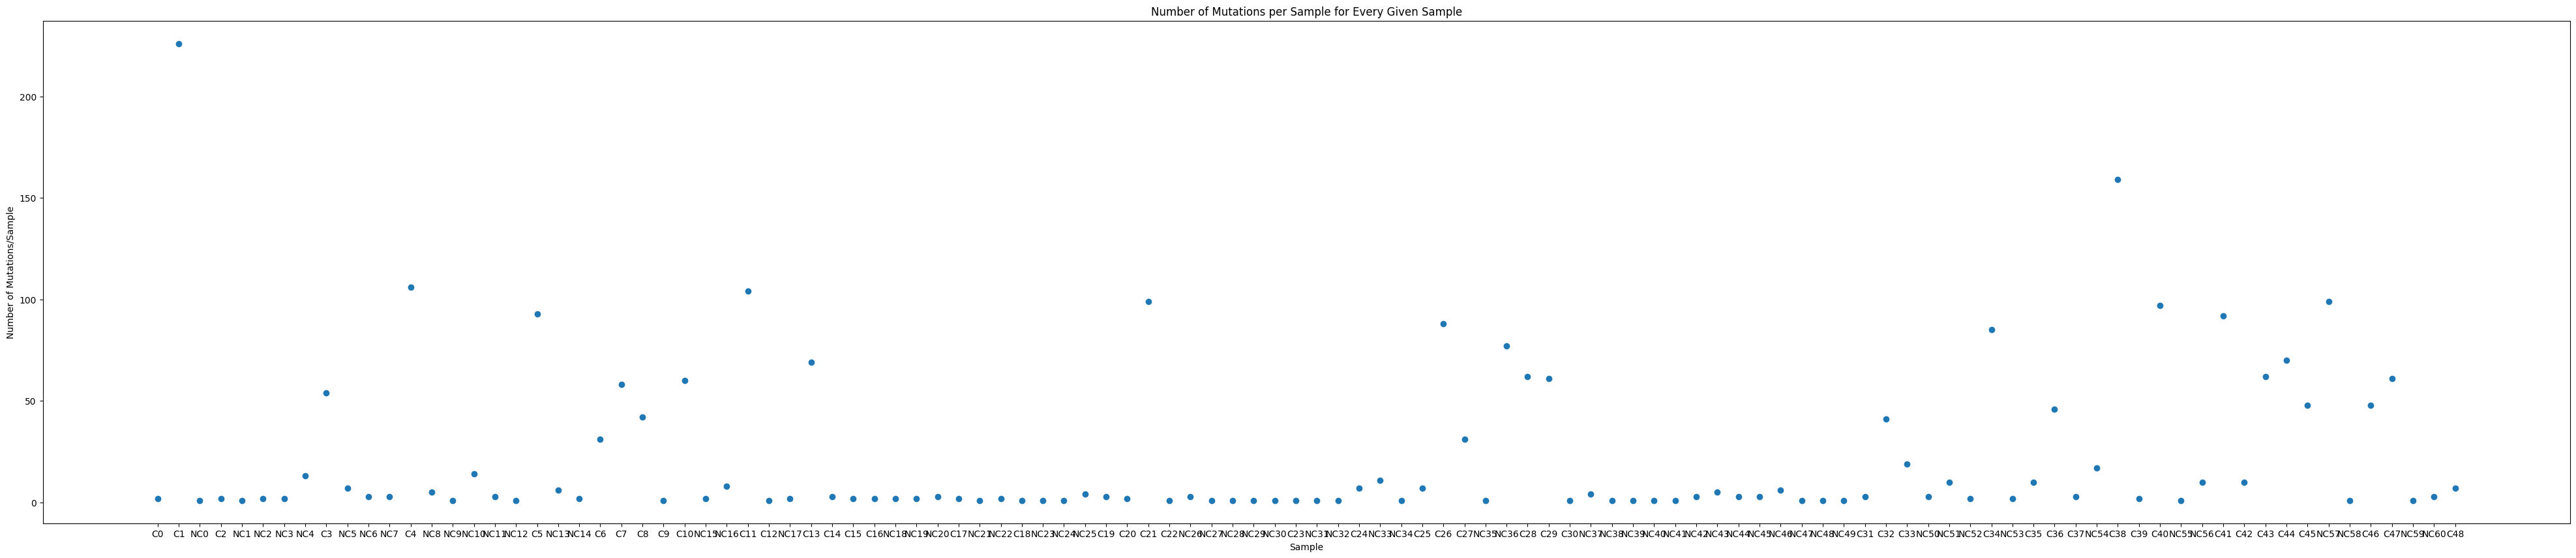

In [2]:
# find the number of mutations per sample
mutations_per_sample = data.sum(axis=1)

plt.figure(figsize=(50, 10))
plt.title('Number of Mutations per Sample for Every Given Sample')
plt.ylabel('Number of Mutations/Sample')
plt.xlabel('Sample')
plt.scatter(mutations_per_sample.index, mutations_per_sample)

# Outlier Genetic Mutations Scatterplot:

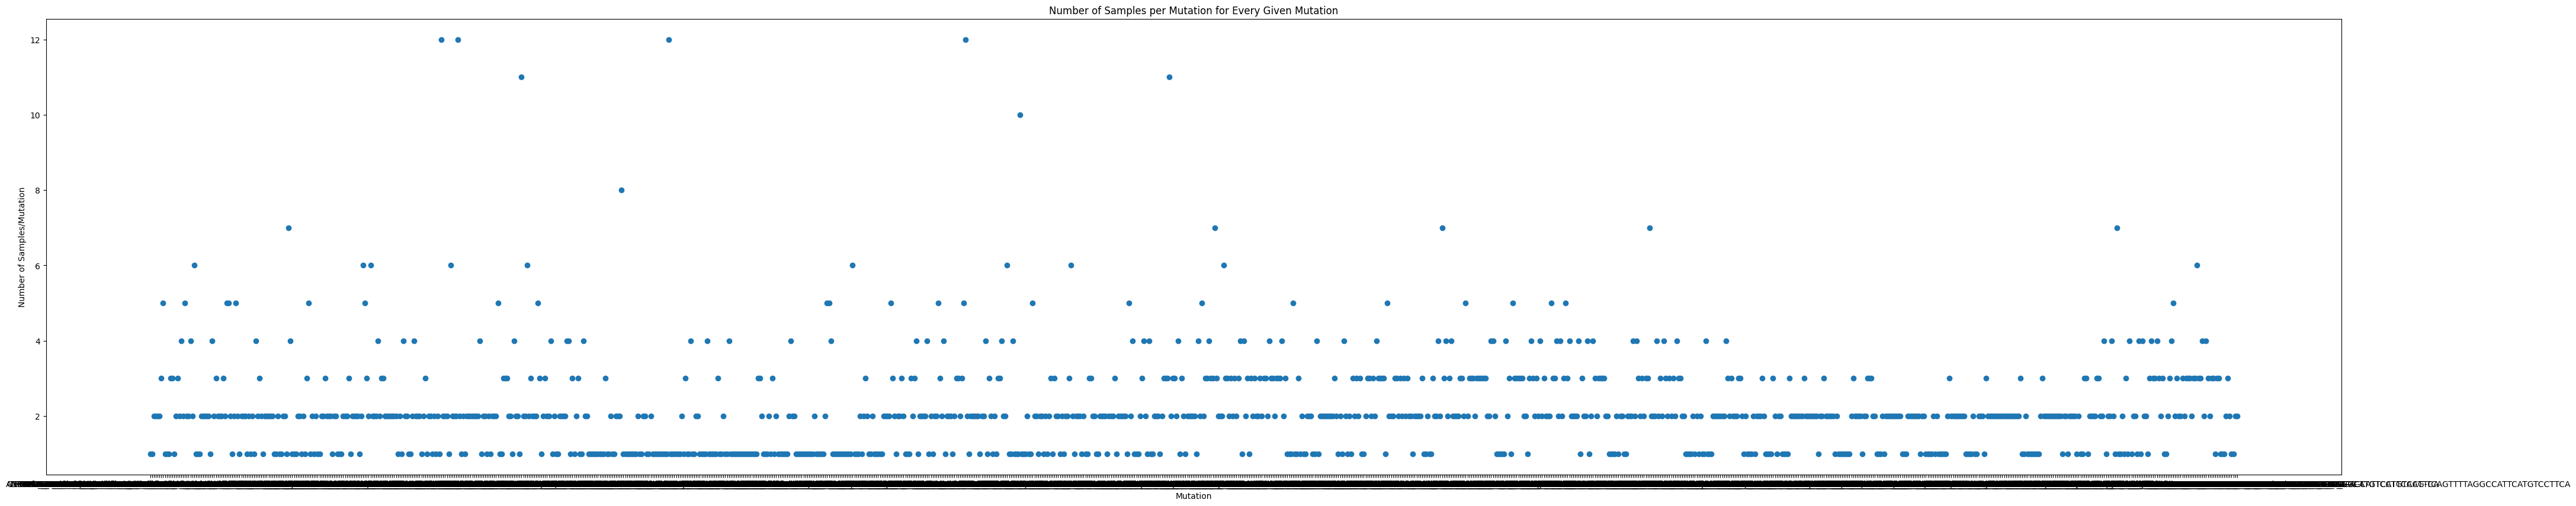

In [3]:
# find the number of samples per mutation
samples_per_mutation = data.sum(axis=0)

plt.figure(figsize=(50, 10))
plt.title('Number of Samples per Mutation for Every Given Mutation')
plt.ylabel('Number of Samples/Mutation')
plt.xlabel('Mutation')
plt.scatter(samples_per_mutation.index, samples_per_mutation)

In [4]:
# make a new dataframe with 7 columns

new_data = pd.DataFrame(columns=['T', 'C', 'NC', '%C', "%NC", "%C - %NC", "%C / %NC"])


# do the math for all of the things we have to rank by

T = data.sum(axis=0)

C = data.loc[data.index.str.startswith('C')].sum(axis=0)

NC = data.loc[data.index.str.startswith('NC')].sum(axis=0)

num_C_patients = data.index.str.startswith('C').sum()
percent_C = (C / num_C_patients) * 100

num_NC_patients = data.index.str.startswith('NC').sum()
percent_NC = (NC / num_NC_patients) * 100

percent_C_minus_NC = percent_C - percent_NC

percent_C_divide_NC = percent_C / (percent_NC + 0.000001)


# assign the values to the new dataframe

new_data['T'] = T
new_data['C'] = C
new_data['NC'] = NC
new_data['%C'] = percent_C.round(2)
new_data['%NC'] = percent_NC.round(2)
new_data['%C - %NC'] = percent_C_minus_NC.round(2)
new_data['%C / %NC'] = percent_C_divide_NC.apply(lambda x: f"{x:.2f}")

# Top 10 Features, When Ranked by T

In [5]:
new_data_sorted = new_data.sort_values(by='T', ascending=False).head(10)
new_data_sorted 

,T,C,NC,%C,%NC,%C - %NC,%C / %NC
ACVR2A_GRCh37_2:148683686-148683686_Frame-Shift-Del_DEL_A-A--,12,11,1,22.45,1.64,20.81,13.69
RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--,12,11,1,22.45,1.64,20.81,13.69
DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-C--,12,12,0,24.49,0.00,24.49,24489795.92
ZBTB20_GRCh37_3:114058003-114058003_Frame-Shift-Del_DEL_G-G--,12,11,1,22.45,1.64,20.81,13.69
RPL22_GRCh37_1:6257785-6257785_Frame-Shift-Del_DEL_T-T--,11,9,2,18.37,3.28,15.09,5.60
UBR5_GRCh37_8:103289349-103289349_Frame-Shift-Del_DEL_T-T--,11,10,1,20.41,1.64,18.77,12.45
PGM5_GRCh37_9:70993145-70993145_Missense-Mutation_SNP_A-A-G,10,10,0,20.41,0.00,20.41,20408163.27
LARP4B_GRCh37_10:890939-890939_Frame-Shift-Del_DEL_T-T--,8,8,0,16.33,0.00,16.33,16326530.61
KDM1B_GRCh37_6:18222307-18222307_3'UTR_DEL_A-A--,7,7,0,14.29,0.00,14.29,14285714.29
TVP23C_GRCh37_17:15441469-15441469_Intron_SNP_C-C-T,7,7,0,14.29,0.00,14.29,14285714.29


# Top 10 Features, When Ranked by C

In [6]:
new_data_sorted = new_data.sort_values(by='C', ascending=False).head(10)
new_data_sorted 

,T,C,NC,%C,%NC,%C - %NC,%C / %NC
DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-C--,12,12,0,24.49,0.00,24.49,24489795.92
ACVR2A_GRCh37_2:148683686-148683686_Frame-Shift-Del_DEL_A-A--,12,11,1,22.45,1.64,20.81,13.69
RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--,12,11,1,22.45,1.64,20.81,13.69
ZBTB20_GRCh37_3:114058003-114058003_Frame-Shift-Del_DEL_G-G--,12,11,1,22.45,1.64,20.81,13.69
PGM5_GRCh37_9:70993145-70993145_Missense-Mutation_SNP_A-A-G,10,10,0,20.41,0.00,20.41,20408163.27
UBR5_GRCh37_8:103289349-103289349_Frame-Shift-Del_DEL_T-T--,11,10,1,20.41,1.64,18.77,12.45
RPL22_GRCh37_1:6257785-6257785_Frame-Shift-Del_DEL_T-T--,11,9,2,18.37,3.28,15.09,5.60
LARP4B_GRCh37_10:890939-890939_Frame-Shift-Del_DEL_T-T--,8,8,0,16.33,0.00,16.33,16326530.61
UPF3A_GRCh37_13:115057211-115057211_Frame-Shift-Del_DEL_A-A--,7,7,0,14.29,0.00,14.29,14285714.29
KIAA0195_GRCh37_17:73491063-73491063_Frame-Shift-Del_DEL_C-C--,7,7,0,14.29,0.00,14.29,14285714.29


# Top 10 Features, When Ranked by NC

In [7]:
new_data_sorted = new_data.sort_values(by='NC', ascending=False).head(10)
new_data_sorted 

,T,C,NC,%C,%NC,%C - %NC,%C / %NC
CNGA4_GRCh37_11:6265440-6265440_Missense-Mutation_SNP_A-A-C,3,0,3,0.00,4.92,-4.92,0.00
KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-T_C-C-A,5,2,3,4.08,4.92,-0.84,0.83
TP53_GRCh37_17:7577120-7577120_Missense-Mutation_SNP_C-C-T,3,0,3,0.00,4.92,-4.92,0.00
CDH1_GRCh37_16:68844172-68844172_Missense-Mutation_SNP_G-G-T,3,0,3,0.00,4.92,-4.92,0.00
TP53_GRCh37_17:7578406-7578406_Missense-Mutation_SNP_C-C-T,4,1,3,2.04,4.92,-2.88,0.41
SOHLH2_GRCh37_13:36776025-36776025_Missense-Mutation_SNP_T-T-C,3,0,3,0.00,4.92,-4.92,0.00
TP53_GRCh37_17:7577094-7577094_Missense-Mutation_SNP_G-G-A,4,1,3,2.04,4.92,-2.88,0.41
PARD3B_GRCh37_2:206166298-206166298_Frame-Shift-Del_DEL_A-A--,4,2,2,4.08,3.28,0.80,1.24
ZNF677_GRCh37_19:53741699-53741699_Missense-Mutation_SNP_A-A-C,2,0,2,0.00,3.28,-3.28,0.00
XIRP2_GRCh37_2:168100923-168100923_Missense-Mutation_SNP_A-A-C,2,0,2,0.00,3.28,-3.28,0.00


# Top 10 Features, When Ranked by %C

In [8]:
new_data_sorted = new_data.sort_values(by='%C', ascending=False).head(10)
new_data_sorted 

,T,C,NC,%C,%NC,%C - %NC,%C / %NC
DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-C--,12,12,0,24.49,0.00,24.49,24489795.92
ACVR2A_GRCh37_2:148683686-148683686_Frame-Shift-Del_DEL_A-A--,12,11,1,22.45,1.64,20.81,13.69
RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--,12,11,1,22.45,1.64,20.81,13.69
ZBTB20_GRCh37_3:114058003-114058003_Frame-Shift-Del_DEL_G-G--,12,11,1,22.45,1.64,20.81,13.69
PGM5_GRCh37_9:70993145-70993145_Missense-Mutation_SNP_A-A-G,10,10,0,20.41,0.00,20.41,20408163.27
UBR5_GRCh37_8:103289349-103289349_Frame-Shift-Del_DEL_T-T--,11,10,1,20.41,1.64,18.77,12.45
RPL22_GRCh37_1:6257785-6257785_Frame-Shift-Del_DEL_T-T--,11,9,2,18.37,3.28,15.09,5.60
LARP4B_GRCh37_10:890939-890939_Frame-Shift-Del_DEL_T-T--,8,8,0,16.33,0.00,16.33,16326530.61
UPF3A_GRCh37_13:115057211-115057211_Frame-Shift-Del_DEL_A-A--,7,7,0,14.29,0.00,14.29,14285714.29
KIAA0195_GRCh37_17:73491063-73491063_Frame-Shift-Del_DEL_C-C--,7,7,0,14.29,0.00,14.29,14285714.29


# Top 10 Features, When Ranked by %NC

In [9]:
new_data_sorted = new_data.sort_values(by='%NC', ascending=False).head(10)
new_data_sorted 

,T,C,NC,%C,%NC,%C - %NC,%C / %NC
CNGA4_GRCh37_11:6265440-6265440_Missense-Mutation_SNP_A-A-C,3,0,3,0.00,4.92,-4.92,0.00
KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-T_C-C-A,5,2,3,4.08,4.92,-0.84,0.83
TP53_GRCh37_17:7577120-7577120_Missense-Mutation_SNP_C-C-T,3,0,3,0.00,4.92,-4.92,0.00
CDH1_GRCh37_16:68844172-68844172_Missense-Mutation_SNP_G-G-T,3,0,3,0.00,4.92,-4.92,0.00
TP53_GRCh37_17:7578406-7578406_Missense-Mutation_SNP_C-C-T,4,1,3,2.04,4.92,-2.88,0.41
SOHLH2_GRCh37_13:36776025-36776025_Missense-Mutation_SNP_T-T-C,3,0,3,0.00,4.92,-4.92,0.00
TP53_GRCh37_17:7577094-7577094_Missense-Mutation_SNP_G-G-A,4,1,3,2.04,4.92,-2.88,0.41
PARD3B_GRCh37_2:206166298-206166298_Frame-Shift-Del_DEL_A-A--,4,2,2,4.08,3.28,0.80,1.24
ZNF677_GRCh37_19:53741699-53741699_Missense-Mutation_SNP_A-A-C,2,0,2,0.00,3.28,-3.28,0.00
XIRP2_GRCh37_2:168100923-168100923_Missense-Mutation_SNP_A-A-C,2,0,2,0.00,3.28,-3.28,0.00


# Top 10 Features, When Ranked by %C - %NC

In [10]:
new_data_sorted = new_data.sort_values(by='%C - %NC', ascending=False).head(10)
new_data_sorted

,T,C,NC,%C,%NC,%C - %NC,%C / %NC
DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-Del_DEL_C-C--,12,12,0,24.49,0.00,24.49,24489795.92
RNF43_GRCh37_17:56435161-56435161_Frame-Shift-Del_DEL_C-C--,12,11,1,22.45,1.64,20.81,13.69
ZBTB20_GRCh37_3:114058003-114058003_Frame-Shift-Del_DEL_G-G--,12,11,1,22.45,1.64,20.81,13.69
ACVR2A_GRCh37_2:148683686-148683686_Frame-Shift-Del_DEL_A-A--,12,11,1,22.45,1.64,20.81,13.69
PGM5_GRCh37_9:70993145-70993145_Missense-Mutation_SNP_A-A-G,10,10,0,20.41,0.00,20.41,20408163.27
UBR5_GRCh37_8:103289349-103289349_Frame-Shift-Del_DEL_T-T--,11,10,1,20.41,1.64,18.77,12.45
LARP4B_GRCh37_10:890939-890939_Frame-Shift-Del_DEL_T-T--,8,8,0,16.33,0.00,16.33,16326530.61
RPL22_GRCh37_1:6257785-6257785_Frame-Shift-Del_DEL_T-T--,11,9,2,18.37,3.28,15.09,5.60
UPF3A_GRCh37_13:115057211-115057211_Frame-Shift-Del_DEL_A-A--,7,7,0,14.29,0.00,14.29,14285714.29
KDM1B_GRCh37_6:18222307-18222307_3'UTR_DEL_A-A--,7,7,0,14.29,0.00,14.29,14285714.29


# Top 10 Features, When Ranked by %C / %NC

In [11]:
new_data_sorted = new_data.sort_values(by='%C / %NC', ascending=False).head(10)
new_data_sorted

,T,C,NC,%C,%NC,%C - %NC,%C / %NC
CADM1_GRCh37_11:115047097-115047097_3'UTR_DEL_A-A--,4,4,0,8.16,0.0,8.16,8163265.31
ERBB3_GRCh37_12:56478854-56478854_Missense-Mutation_SNP_G-G-T_G-G-A,4,4,0,8.16,0.0,8.16,8163265.31
KLF3_GRCh37_4:38691476-38691476_Frame-Shift-Del_DEL_C-C--,4,4,0,8.16,0.0,8.16,8163265.31
EBF3_GRCh37_10:131666125-131666125_Frame-Shift-Del_DEL_C-C--,4,4,0,8.16,0.0,8.16,8163265.31
RNF128_GRCh37_X:105937256-105937256_Frame-Shift-Del_DEL_T-T--,4,4,0,8.16,0.0,8.16,8163265.31
EDNRB_GRCh37_13:78475267-78475267_Frame-Shift-Del_DEL_A-A--,4,4,0,8.16,0.0,8.16,8163265.31
ZDBF2_GRCh37_2:207174428-207174428_Frame-Shift-Del_DEL_A-A--,4,4,0,8.16,0.0,8.16,8163265.31
IWS1_GRCh37_2:128238676-128238676_Frame-Shift-Del_DEL_T-T--,4,4,0,8.16,0.0,8.16,8163265.31
TMEM132D_GRCh37_12:130184705-130184705_Frame-Shift-Del_DEL_G-G--,4,4,0,8.16,0.0,8.16,8163265.31
ILKAP_GRCh37_2:239079047-239079047_3'UTR_DEL_A-A--,4,4,0,8.16,0.0,8.16,8163265.31
